x_train shape: (120000, 28, 28, 1)
120000 train samples
20000 test samples
number of classes: 20
After augmentation:
x_train shape: (480000, 28, 28, 1)
480000 train samples
80000 test samples


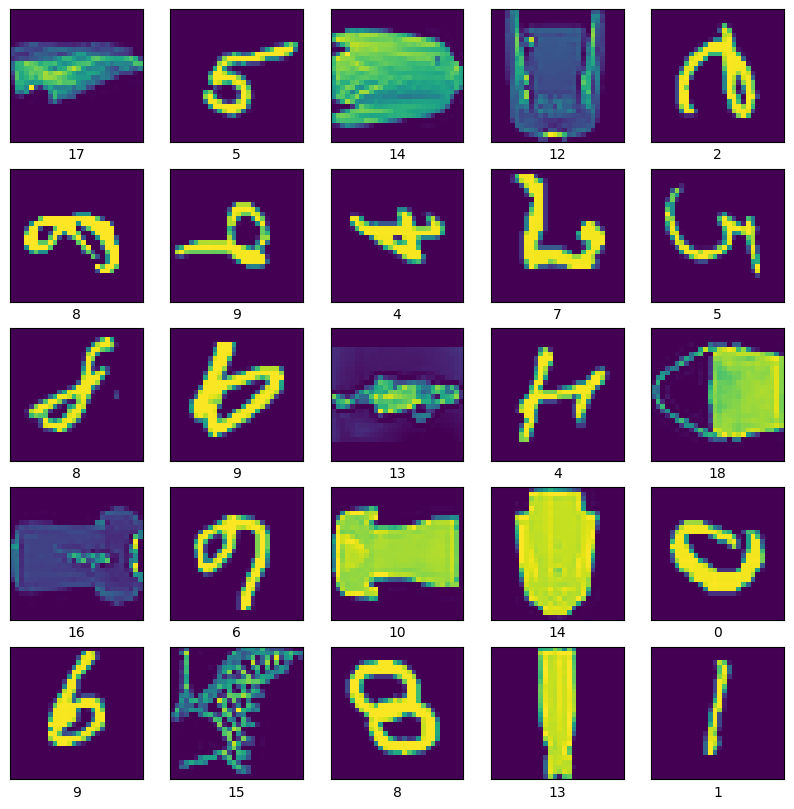

In [2]:
import numpy as np
import keras

"""
0 0-9 digits
"""
#(x_handwritten_mnist_train, y_handwritten_mnist_train), (x_handwritten_mnist_test, y_handwritten_mnist_test) = keras.datasets.mnist.load_data()
handwritten_mnist = keras.datasets.mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""
# (x_fashion_mnist_train, y_fashion_mnist_train), (x_fashion_mnist_test, y_fashion_mnist_test) = keras.datasets.fashion_mnist.load_data()
fashion_mnist = keras.datasets.fashion_mnist.load_data()

# combine the two datasets, changing the labels of the fashion MNIST +10 (num_handwritten_classes) to avoid overlap
num_handwritten_classes = len(np.unique(handwritten_mnist[0][1]))
x_mnist_train = np.concatenate((handwritten_mnist[0][0], fashion_mnist[0][0]), axis=0) # image: shape (60000, 28, 28)
y_mnist_train = np.concatenate((handwritten_mnist[0][1], fashion_mnist[0][1] + num_handwritten_classes), axis=0) # label: shape (60000,)
x_mnist_test = np.concatenate((handwritten_mnist[1][0], fashion_mnist[1][0]), axis=0) # image: shape (10000, 28, 28)
y_mnist_test = np.concatenate((handwritten_mnist[1][1], fashion_mnist[1][1] + num_handwritten_classes), axis=0) # label: shape (10000,)

# Scale images to the [0, 1] range
x_mnist_train = x_mnist_train.astype("float32") / 255
x_mnist_test = x_mnist_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_mnist_train = np.expand_dims(x_mnist_train, -1)
x_mnist_test = np.expand_dims(x_mnist_test, -1)
print("x_train shape:", x_mnist_train.shape)
print(x_mnist_train.shape[0], "train samples")
print(x_mnist_test.shape[0], "test samples")

# find number of classes
num_classes = len(np.unique(np.concatenate((y_mnist_train, y_mnist_test))))
print("number of classes:", num_classes)

# convert class vectors to binary class matrices
y_mnist_train = keras.utils.to_categorical(y_mnist_train, num_classes) 
y_mnist_test = keras.utils.to_categorical(y_mnist_test, num_classes)

# increase dataset size (not necessarily complexity) by rotating images by 90,180,270 degrees
def augment_data(x_data, y_data):
    x_augmented = []
    y_augmented = []
    for i in range(x_data.shape[0]):
        x_augmented.append(x_data[i])
        y_augmented.append(y_data[i])
        for angle in [90, 180, 270]:
            x_rotated = np.rot90(x_data[i], k=angle//90)
            x_augmented.append(x_rotated)
            y_augmented.append(y_data[i])
    return np.array(x_augmented), np.array(y_augmented)
x_mnist_train, y_mnist_train = augment_data(x_mnist_train, y_mnist_train)
x_mnist_test, y_mnist_test = augment_data(x_mnist_test, y_mnist_test)
print("After augmentation:")
print("x_train shape:", x_mnist_train.shape)
print(x_mnist_train.shape[0], "train samples")
print(x_mnist_test.shape[0], "test samples")

# shuffle the combined dataset
rng = np.random.default_rng(seed=42)
train_indices = rng.permutation(x_mnist_train.shape[0])
x_mnist_train = x_mnist_train[train_indices]
y_mnist_train = y_mnist_train[train_indices]
# same for test set
test_indices = rng.permutation(x_mnist_test.shape[0])
x_mnist_test = x_mnist_test[test_indices]
y_mnist_test = y_mnist_test[test_indices]

# show some data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_mnist_train[i].reshape(28,28)
               #, cmap=plt.cm.binary
               )
    plt.xlabel(np.argmax(y_mnist_train[i]))

Model: "mnist-cnn-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        32,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,836 (198.58 KB)

 Trainable params: 50,836 (198.58 KB)

 Non-trainable params: 0 (0.00 B)

Creating visualization for model: mnist-cnn-model
Processing input layer...
Processing layer 0: Conv2D
Processing layer 1: MaxPooling2D
Processing layer 2: Conv2D
Processing layer 3: MaxPooling2D
Processing layer 4: Flatten
Processing layer 5: Dropout
Processing layer 6: Dense
Visualization saved as 'tmp/mnist-cnn-model.png'


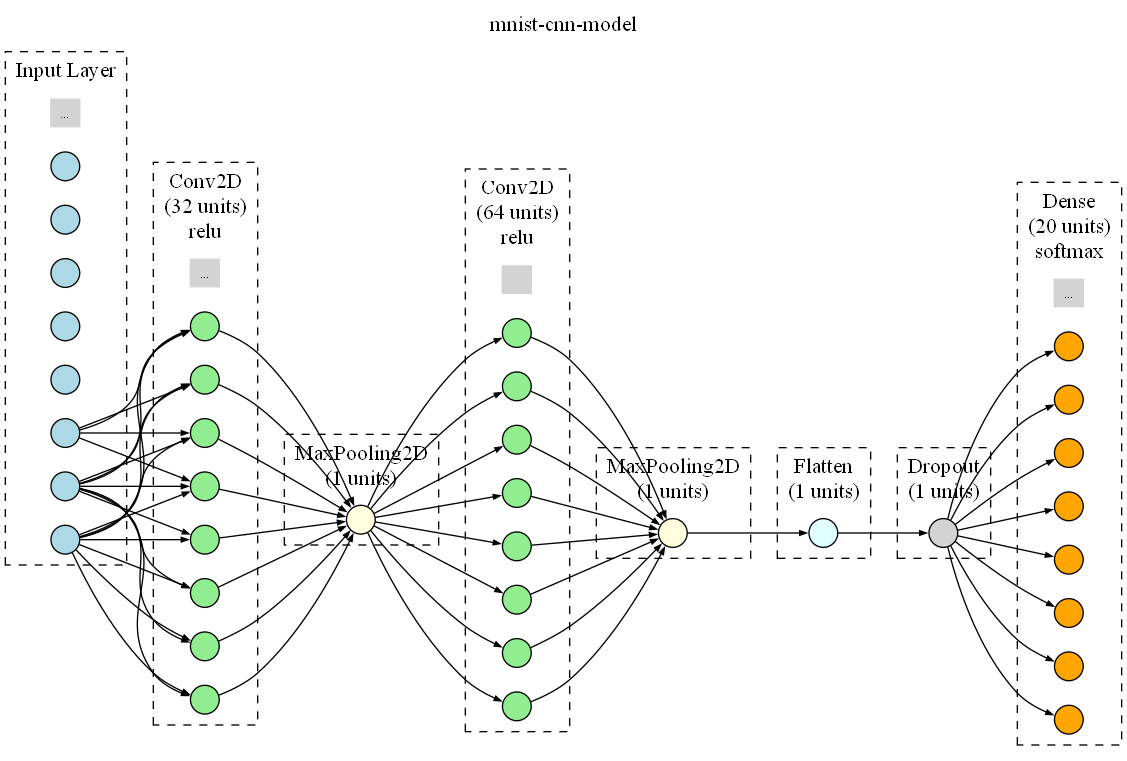

In [3]:
import sys, os
import keras
# add parent path folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../02')))
from utils import display_nn_graph

input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ],name="mnist-cnn-model"
)

model.summary()
display_nn_graph(model, filename='tmp/mnist-cnn-model')

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_mnist_train, y_mnist_train, epochs=10, validation_split=0.3, verbose=1)

Epoch 1/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 108s 10ms/step - accuracy: 0.7945 - loss: 0.6106 - val_accuracy: 0.8855 - val_loss: 0.3453
Epoch 2/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.8579 - loss: 0.4171 - val_accuracy: 0.8986 - val_loss: 0.3022
Epoch 3/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 101s 10ms/step - accuracy: 0.8710 - loss: 0.3767 - val_accuracy: 0.9053 - val_loss: 0.2802
Epoch 4/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 112s 11ms/step - accuracy: 0.8773 - loss: 0.3584 - val_accuracy: 0.9095 - val_loss: 0.2687
Epoch 5/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 122s 12ms/step - accuracy: 0.8821 - loss: 0.3452 - val_accuracy: 0.9114 - val_loss: 0.2599
Epoch 6/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 134s 11ms/step - accuracy: 0.8849 - loss: 0.3360 - val_accuracy: 0.9109 - val_loss: 0.2601
Epoch 7/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 119s 11ms/step - accuracy: 0.8868 - loss: 0.3300 - val_accuracy: 0.9117 - val_loss: 0.2569
Epoch 8/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 116s 11ms/s

In [22]:
model.save('mnist-cnn-model.keras')

Loss: 0.2519, Accuracy: 0.9137


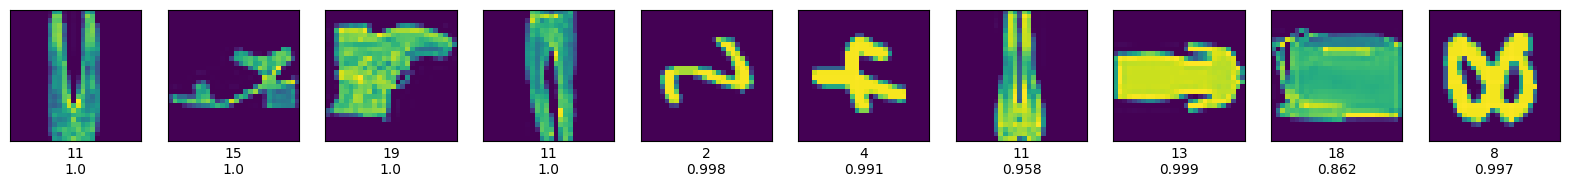

In [4]:
import keras

# load fitted model & evaluate
model = keras.models.load_model('mnist-cnn-model.keras')
score = model.evaluate(x_mnist_test, y_mnist_test, verbose=0)
print(f"Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")
plt.figure(figsize=(20,30))
for i in range(10):    
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(
        x_mnist_test[i].reshape(28,28), 
        #cmap=plt.cm.binary
        )
    _preds = model.predict(x_mnist_test[i:i+1], verbose=0)[0]
    #print(f"Image {i} predictions: {_preds.round(3)}")
    plt.xlabel(f"{np.argmax(_preds)}\n{np.max(_preds).round(3).astype(str)}")
plt.show()    


QUANTIZED MODEL (32-bit)

=== Quantizing model to 32-bit precision ===
Model quantized to 32-bit precision
Parameters: 50,836
Model size: 0.19 MB
32-bit - Loss: 0.2519, Accuracy: 0.9137


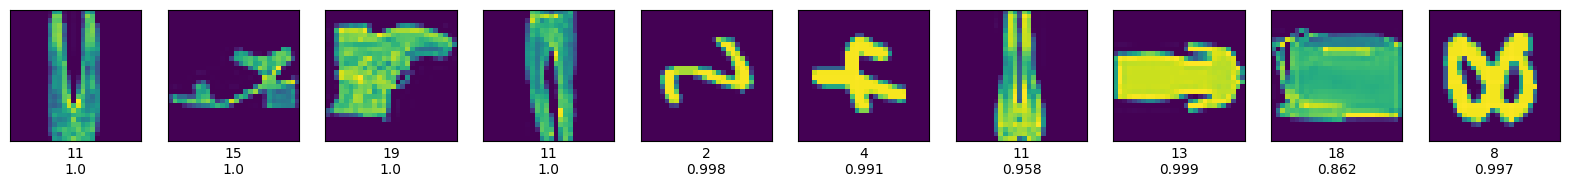


QUANTIZED MODEL (16-bit)

=== Quantizing model to 16-bit precision ===
Model quantized to 16-bit precision
Parameters: 50,836
Model size: 0.10 MB
16-bit - Loss: 0.2518, Accuracy: 0.9139


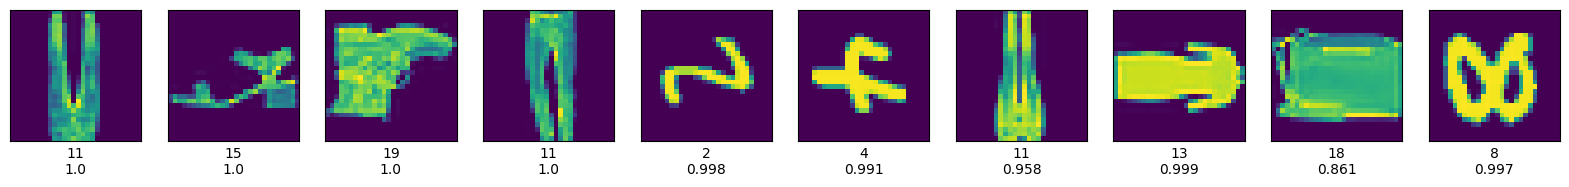


QUANTIZED MODEL (8-bit)

=== Quantizing model to 8-bit precision ===
Model quantized to 8-bit precision
Parameters: 50,836
Model size: 0.05 MB
8-bit - Loss: 0.2553, Accuracy: 0.9130


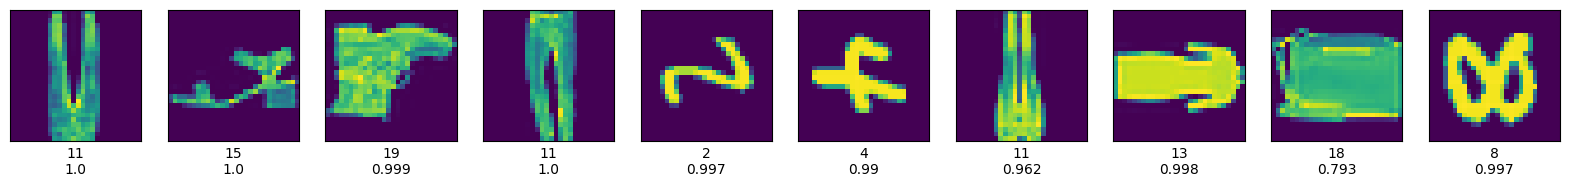


QUANTIZED MODEL (4-bit)

=== Quantizing model to 4-bit precision ===
Model quantized to 4-bit precision
Parameters: 50,836
Model size: 0.02 MB
4-bit - Loss: 7.0554, Accuracy: 0.2597


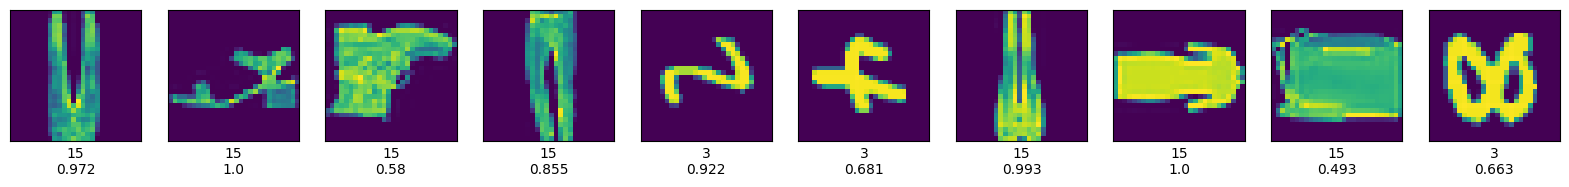


QUANTIZED MODEL (2-bit)

=== Quantizing model to 2-bit precision ===
Model quantized to 2-bit precision
Parameters: 50,836
Model size: 0.01 MB
2-bit - Loss: 6.8680, Accuracy: 0.0694


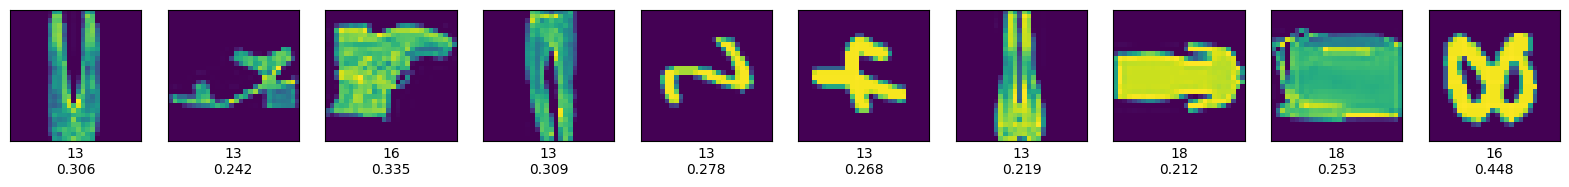


QUANTIZATION RESULTS SUMMARY
 Precision  Size (MB)   Size Ratio Predictions/sec     Loss   Accuracy  Acc. Drop
------------------------------------------------------------------------------------------
        32       0.19          1.0x     8151.37   0.2519     0.9137     0.0000
        16       0.10          2.0x     8662.06   0.2518     0.9139    -0.0002
         8       0.05          4.0x     6780.59   0.2553     0.9130     0.0007
         4       0.02          8.0x     6526.19   7.0554     0.2597     0.6540
         2       0.01         16.0x     7630.10   6.8680     0.0694     0.8443


In [24]:
import keras
import time

# load full precision model
model = keras.models.load_model('mnist-cnn-model.keras')

def get_model_size(model, precision_bits=32):
    """Simulated model size estimation in MB based on precision"""
    param_size = 0
    for layer in model.layers:
        if hasattr(layer, 'get_weights'):
            weights = layer.get_weights()
            for weight in weights:
                param_size += weight.size
    
    # calculate size based on precision (bits per parameter)
    bytes_per_param = precision_bits / 8
    size_mb = (param_size * bytes_per_param) / (1024 * 1024)
    return param_size, size_mb

def quantize_model(precision_bits):
    print(f"\n=== Quantizing model to {precision_bits}-bit precision ===")
    q_model = keras.models.clone_model(model) # create a copy of the model structure with new weights

    # copy/quantize the weights
    for i, layer in enumerate(q_model.layers):
        if hasattr(layer, 'get_weights') and layer.get_weights():
            # copy weights from the original trained model
            weights_and_biases = model.layers[i].get_weights()
            quantized_weights = []
            
            for weight_matrix in weights_and_biases:
                if precision_bits == 32:
                    # no quantization for full model
                    quantized_weights.append(weight_matrix)
                else:
                    # memory optimization
                    # for 16-bit, 8-bit, 4-bit, 2-bit: quantize and use float16 for storage
                    # (float16 is the smallest floating point type in numpy/keras)
                    _castType = np.float16

                    # symmetric quantization around zero
                    max_abs_val = np.max(np.abs(weight_matrix))
                    
                    if max_abs_val == 0:
                        # handle zero weights
                        quantized_weights.append(weight_matrix.astype(np.int8))
                        continue
                    
                    # calculate quantization levels
                    n_levels = 2**precision_bits
                    scale = (2 * max_abs_val) / (n_levels - 1)
                    
                    # quantize: map to discrete levels rounding to 
                    quantized = np.round(weight_matrix / scale) * scale
                    
                    # clip to the quantization range: limit values to [-max_abs_val, max_abs_val]
                    quantized = np.clip(quantized, -max_abs_val, max_abs_val)

                    quantized_weights.append(quantized.astype(_castType))

            layer.set_weights(quantized_weights)
    
    print(f"Model quantized to {precision_bits}-bit precision")
    q_model.save(f'mnist-cnn-model-q{precision_bits}.keras')
    return q_model

def evaluate_model(q_model, model_name="Model"):
    score = q_model.evaluate(x_mnist_test, y_mnist_test, verbose=0)
    print(f"{model_name} - Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")
    plt.figure(figsize=(20,30))
    for i in range(10):    
        plt.subplot(1,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(
            x_mnist_test[i].reshape(28,28), 
            #cmap=plt.cm.binary
            )
        _preds = q_model.predict(x_mnist_test[i:i+1], verbose=0)[0]
        #print(f"Image {i} predictions: {_preds.round(3)}")
        plt.xlabel(f"{np.argmax(_preds)}\n{np.max(_preds).round(3).astype(str)}")
    plt.show()    
    return score[0], score[1]

# Results tracking
results = []
num_predictions_measured = len(x_mnist_test)
# quantize and evaluate the quantized models (without retraining)
for precision in [32, 16, 8, 4, 2]:
    print(f"\n{'=' * 60}")
    print(f"QUANTIZED MODEL ({precision}-bit)")
    print(f"{'=' * 60}")
    
    q_model = quantize_model(precision)
    
    # calculate quantized model size
    param_count, size_mb = get_model_size(q_model, precision)
    print(f"Parameters: {param_count:,}")
    print(f"Model size: {size_mb:.2f} MB")
    
    # evaluate model and measure prediction time
    start_time = time.time()
    loss, accuracy = evaluate_model(q_model, f"{precision}-bit")
    predictions_per_second = num_predictions_measured / (time.time() - start_time)
    
    results.append({
        'precision': precision,
        'size_mb': size_mb,
        'predictions_per_second': predictions_per_second,
        'loss': loss,
        'accuracy': accuracy
    })

# summary
print(f"\n{'=' * 90}")
print("QUANTIZATION RESULTS SUMMARY")
print(f"{'=' * 90}")
print(f"{'Precision':>10} {'Size (MB)':>10} {'Size Ratio':>12} {'Predictions/sec':>12} {'Loss':>8} {'Accuracy':>10} {'Acc. Drop':>10}")
print("-" * 90)

baseline_accuracy = results[0]['accuracy']
baseline_size = results[0]['size_mb']
for result in results:
    accuracy_drop = baseline_accuracy - result['accuracy']
    size_ratio = baseline_size / result['size_mb'] if result['size_mb'] > 0 else 0
    print(f"{result['precision']:>10} {result['size_mb']:>10.2f} {size_ratio:>12.1f}x "
          f"{result['predictions_per_second']:>11.2f} {result['loss']:>8.4f} {result['accuracy']:>10.4f} {accuracy_drop:>10.4f}")

In [25]:
def analyze_weights(model, model_name="Model"):
    print(f"\n--- Weight Analysis for {model_name} ---")
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'get_weights') and layer.get_weights():
            weights = layer.get_weights()[0]  # only weights (not biases)
            print(f"Layer {i} ({layer.name}):")
            print(f"  Weight range: [{weights.min():.16f}, {weights.max():.16f}]")
            print(f"  Weight std: {weights.std():.16f}")
            # many weights being near zero means they contribute little to the model's decision, making them more tolerant to quantization errors
            # this is why 8-bit quantization continue to work so well.
            print(f"  % of weights near zero (|w| < 0.01): {(np.abs(weights) < 0.01).mean()*100:.1f}%")      

for precision in [32, 16, 8, 4, 2]:
    q_model = keras.models.load_model(f'mnist-cnn-model-q{precision}.keras')
    analyze_weights(q_model, f"q_{precision}")

print("- Open Netron in browser: https://netron.app/")    


--- Weight Analysis for q_32 ---
Layer 0 (conv2d_2):
  Weight range: [-4.0120944976806641, 0.5264619588851929]
  Weight std: 0.7007563114166260
  % of weights near zero (|w| < 0.01): 1.7%
Layer 2 (conv2d_3):
  Weight range: [-2.3431160449981689, 1.0975493192672729]
  Weight std: 0.3178364932537079
  % of weights near zero (|w| < 0.01): 3.2%
Layer 6 (dense_1):
  Weight range: [-3.4591062068939209, 1.4396268129348755]
  Weight std: 0.4748014807701111
  % of weights near zero (|w| < 0.01): 2.7%

--- Weight Analysis for q_16 ---
Layer 0 (conv2d_2):
  Weight range: [-4.0117187500000000, 0.5263671875000000]
  Weight std: 0.7007323503494263
  % of weights near zero (|w| < 0.01): 1.7%
Layer 2 (conv2d_3):
  Weight range: [-2.3437500000000000, 1.0976562500000000]
  Weight std: 0.3178383111953735
  % of weights near zero (|w| < 0.01): 3.2%
Layer 6 (dense_1):
  Weight range: [-3.4589843750000000, 1.4394531250000000]
  Weight std: 0.4747991263866425
  % of weights near zero (|w| < 0.01): 2.7%

---

In [26]:
import keras
import netron

base_path = 'mnist-cnn-model.keras'
# load full-precision fitted mode & create baseline outputs
model = keras.models.load_model(base_path)
y_fp32 = model(x_mnist_test)

# load & quantize the model in-place & get quantized outputs: without retraining
q8_model = keras.models.load_model(base_path)
q8_model.quantize("int8")
q8_model.save("mnist-cnn-model-kq8.keras")
y_int8 = q8_model(x_mnist_test)

# load & quantize the model in-place & get quantized outputs: without retraining
q4_model = keras.models.load_model(base_path)
q4_model.quantize("int4")
q4_model.save("mnist-cnn-model-kq4.keras")
y_int4 = q4_model(x_mnist_test)

# compute MSE between FP and INT8 outputs.
mse = keras.ops.mean(keras.ops.square(y_fp32 - y_int8))
print("Full-Precision vs INT8 MSE:", float(mse))
mse = keras.ops.mean(keras.ops.square(y_fp32 - y_int4))
print("Full-Precision vs INT4 MSE:", float(mse))

netron.start("mnist-cnn-model-kq4.keras")
# open also netron app: https://netron.app/ comparing mnist-cnn-model.keras vs mnist-cnn-model-q32.keras

model.summary()
q4_model.summary()


c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:455: UserWarning: Layer InputLayer does not have a `quantize` method implemented.
  warnings.warn(str(e))
c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:455: UserWarning: Layer Conv2D does not have a `quantize` method implemented.
  warnings.warn(str(e))
c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:455: UserWarning: Layer MaxPooling2D does not have a `quantize` method implemented.
  warnings.warn(str(e))
c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:455: UserWarning: Layer Flatten does not have a `quantize` method implemented.
  warnings.warn(str(e))
c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\model.py:455: UserWarning: Layer Dropout does not have a `quantize` method 

Full-Precision vs INT8 MSE: 3.481576413832954e-06
Full-Precision vs INT4 MSE: 0.0008479159441776574


Model: "mnist-cnn-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │        32,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,510 (595.75 KB)

 Trainable params: 50,836 (198.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,674 (397.17 KB)

Model: "mnist-cnn-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │        16,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,530 (486.45 KB)

 Trainable params: 18,836 (73.58 KB)

 Non-trainable params: 16,020 (15.70 KB)

 Optimizer params: 101,674 (397.17 KB)

c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loss: 0.2901, Accuracy: 0.8997


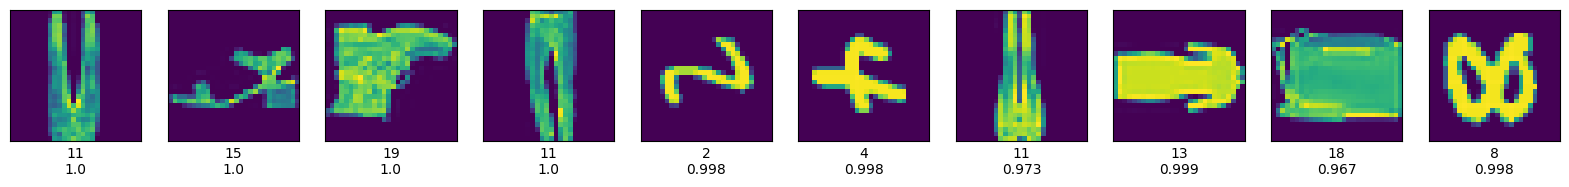

In [ ]:
import keras

# load q4 model & evaluate
q_model = keras.models.load_model('mnist-cnn-model-kq4.keras')
score = q_model.evaluate(x_mnist_test, y_mnist_test, verbose=0)
print(f"Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")
plt.figure(figsize=(20,30))
for i in range(10):    
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(
        x_mnist_test[i].reshape(28,28), 
        #cmap=plt.cm.binary
        )
    _preds = q_model.predict(x_mnist_test[i:i+1], verbose=0)[0]
    plt.xlabel(f"{np.argmax(_preds)}\n{np.max(_preds).round(3).astype(str)}")
plt.show()   

In [ ]:
!pip install -U bitsandbytes accelerate

In [12]:
from dotenv import load_dotenv
import os
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, TRANSFORMERS_CACHE
import torch
load_dotenv('../.env')

# Configure 8-bit quantization
bnb_config_8bit = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_threshold=6.0,
)

# Configure 4-bit quantization (more aggressive)
bnb_config_4bit = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4",  # normalized float 4-bit
    bnb_4bit_use_double_quant=True,  # nested quantization for additional compression
)

device = "cuda" if torch.cuda.is_available() else "cpu"
#model_name = "google/gemma-3-1b-it"
model_name = "Qwen/Qwen3-0.6B" 
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Option 1a: Load FP32/BF16 model (baseline)
print("Loading full-precision model...")
model_fp = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# Option 1b: Load with 8-bit quantization
print("\nLoading 8-bit quantized model...")
model_int8 = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config_8bit,
    device_map="auto"
)

# Option 1c: Load with 4-bit quantization
print("\nLoading 4-bit quantized model...")
model_int4 = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config_4bit,
    device_map="auto"
)

# Test generation with all models
test_prompt = "Walt Whitman was a"
inputs = tokenizer(test_prompt, return_tensors="pt").to(device)

print("\n" + "="*60)
print("GENERATION COMPARISON")
print("="*60)

# Full precision
print("\nFull-precision output:")
outputs_fp = model_fp.generate(**inputs, max_new_tokens=50, do_sample=False)
print(tokenizer.decode(outputs_fp[0], skip_special_tokens=True))

# 8-bit
print("\n8-bit quantized output:")
outputs_int8 = model_int8.generate(**inputs, max_new_tokens=50, do_sample=False)
print(tokenizer.decode(outputs_int8[0], skip_special_tokens=True))

# 4-bit
print("\n4-bit quantized output:")
outputs_int4 = model_int4.generate(**inputs, max_new_tokens=50, do_sample=False)
print(tokenizer.decode(outputs_int4[0], skip_special_tokens=True))

# Compare model sizes
print("\n" + "="*60)
print("MODEL SIZE COMPARISON")
print("="*60)

def get_model_memory_footprint(model):
    """Calculate approximate memory footprint in MB"""
    mem_params = sum([param.nelement()*param.element_size() for param in model.parameters()])
    mem_bufs = sum([buf.nelement()*buf.element_size() for buf in model.buffers()])
    mem_mb = (mem_params + mem_bufs) / (1024**2)
    return mem_mb

print(f"Full-precision model: {get_model_memory_footprint(model_fp):.2f} MB")
print(f"8-bit quantized model: {get_model_memory_footprint(model_int8):.2f} MB")
print(f"4-bit quantized model: {get_model_memory_footprint(model_int4):.2f} MB")

# Save quantized models
print("\nSaving quantized models...")
model_name_to_save = model_name.replace('/', '--')
model_int8.save_pretrained(os.path.join(os.environ['HF_HOME'], 'hub', f'models--{model_name_to_save}-q8'))
tokenizer.save_pretrained(os.path.join(os.environ['HF_HOME'], 'hub', f'models--{model_name_to_save}-q8'))
model_int4.save_pretrained(os.path.join(os.environ['HF_HOME'], 'hub', f'models--{model_name_to_save}-q4'))
tokenizer.save_pretrained(os.path.join(os.environ['HF_HOME'], 'hub', f'models--{model_name_to_save}-q4'))

Loading full-precision model...

Loading 8-bit quantized model...

Loading 4-bit quantized model...


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



GENERATION COMPARISON

Full-precision output:
Walt Whitman was a poet who wrote a poem called "Song of the West" in 1855. The poem is a collection of 100 lines. The first line is "I am a man of the West, and I am a man of

8-bit quantized output:
Walt Whitman was a poet who wrote a poem called "Song of the West Wind." The poem is a collection of 100 lines. Each line has 10 words. The first line has 10 words, and the second line has 10

4-bit quantized output:
Walt Whitman was a poet who lived in the 18th century. He wrote a poem that was about the life of a man. He was a man who lived in the 18th century. He was a man who lived in the 18th

MODEL SIZE COMPARISON
Full-precision model: 1136.88 MB
8-bit quantized model: 716.88 MB
4-bit quantized model: 506.88 MB

Saving quantized models...


('D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\tokenizer_config.json',
 'D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\special_tokens_map.json',
 'D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\chat_template.jinja',
 'D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\vocab.json',
 'D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\merges.txt',
 'D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\added_tokens.json',
 'D:\\.cache\\huggingface\\hub\\models--Qwen--Qwen3-0.6B-q4\\tokenizer.json')

In [11]:
     
import os
from transformers import pipeline
from dotenv import load_dotenv
load_dotenv('../.env')

pipe = pipeline("text-generation", model=f"{os.environ['HF_HOME']}/hub/models--google--gemma-3-1b-it-q8")

messages = [
    [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."},]
        },
        {
            "role": "user",
            "content": [{"type": "text", "text": "Write a poem on LLM, in the style of Shakespeare."},]
        },
    ],
]

output = pipe(messages, max_new_tokens=255)
print(output)


Device set to use cpu


[[{'generated_text': [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are a helpful assistant.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Write a poem on LLM, in the style of Shakespeare.'}]}, {'role': 'assistant', 'content': "Hark, gentle souls, and lend a listening ear,\nTo tales of minds, both wondrous and so clear!\nA marvel wrought, a silicon so bright,\nA Language Large, a digital light!\n\nWe speak of LLM, a clever, shifting guise,\nA mimicry of thought, before our eyes.\nNo flesh and bone, no breath within its core,\nBut patterns learned, and data to explore.\n\nIt drinks the words, a boundless, surging stream,\nAnd weaves a tapestry of every dream.\nIt writes of love, of battles fierce and bold,\nAnd tales of kings, in histories untold.\n\nIt answers questions, swift and clear and true,\nA tireless servant, ever fresh and new.\nIt crafts a sonnet, elegant and grand,\nA mimic of the poet’s skillful hand.\n\nYet caution whispers, let us understand,\

In [ ]:
# This requires installing llama-cpp-python and using conversion scripts
# More info: https://github.com/ggerganov/llama.cpp

# Note: This is typically done outside Python with command-line tools:
# 1. Convert model to GGUF format
# 2. Quantize GGUF model to Q4_K_M, Q5_K_M, Q8_0, etc.
# 3. Use llama-cpp-python to load quantized model

# Example (requires llama-cpp-python installed):
# from llama_cpp import Llama
# 
# model = Llama(
#     model_path="gemma-3-1b-it-Q4_K_M.gguf",
#     n_ctx=2048,
#     n_threads=8
# )
# 
# output = model("Keras is a", max_tokens=50)
# print(output)

print("For GGUF quantization, see: https://github.com/ggerganov/llama.cpp")